In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/neural_neworks':
  os.chdir(r'/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estadísti-a-descriptiva-a-redes-neuronales/neural_neworks')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/tmp/ipykernel_40980/522916513.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1712727227.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1712727227.0, "/usr/lib/python3.12/zipimport.py": 1712727227.0, "/usr/lib/python3.12/codecs.py": 1712727227.0, "/usr/lib/python3.12/encodings/aliases.py": 1712727227.0, "/usr/lib/python3.12/encodings/__init__.py": 1712727227.0, "/usr/lib/python3.12/encodings/utf_8.py": 1712727227.0, "/usr/lib/python3.12/abc.py": 1712727227.0, "/usr/lib/python3.12/io.py": 1712727227.0, "/usr/lib/python3.12/stat.py": 1712727227.0, "/usr/lib/python3.12/_collections_abc.py": 1712727227.0, "/usr/lib/python3.12/genericpath.py": 1712727227.0, "/usr/lib/python3.12/posixpath.py": 1712727227.0, "/usr/lib/python3.12/os.py": 1712727227.0, "/usr/lib/python3.12/_sitebuiltins.py": 1712727227.0, "/home/quicho/Escritorio/Ciencia-de-datos-con-Python-de-estad\u00edsti-a-descriptiva-a-redes-neuronales/venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1719277463.2587285, "/usr/lib/python3.12/s

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

print(iris.target_names)
print(iris.feature_names)
print(X.shape)
print(y.shape)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 4)
(150,)


In [3]:
# Dividir la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear la red neuronal artificial
clf = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42, 
                    activation='relu', solver='sgd', learning_rate='adaptive', 
                    learning_rate_init=0.001)

# Entrenar la red neuronal artificial
clf.fit(X_train, y_train)

# Evaluar la red neuronal artificial
score = clf.score(X_test, y_test)
print(score)

0.9333333333333333


In [4]:
# Obtener las predicciones de la red neuronal artificial
y_pred = clf.predict(X_test)
print(y_pred)

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 1 2 2 2 0 0]


In [5]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]


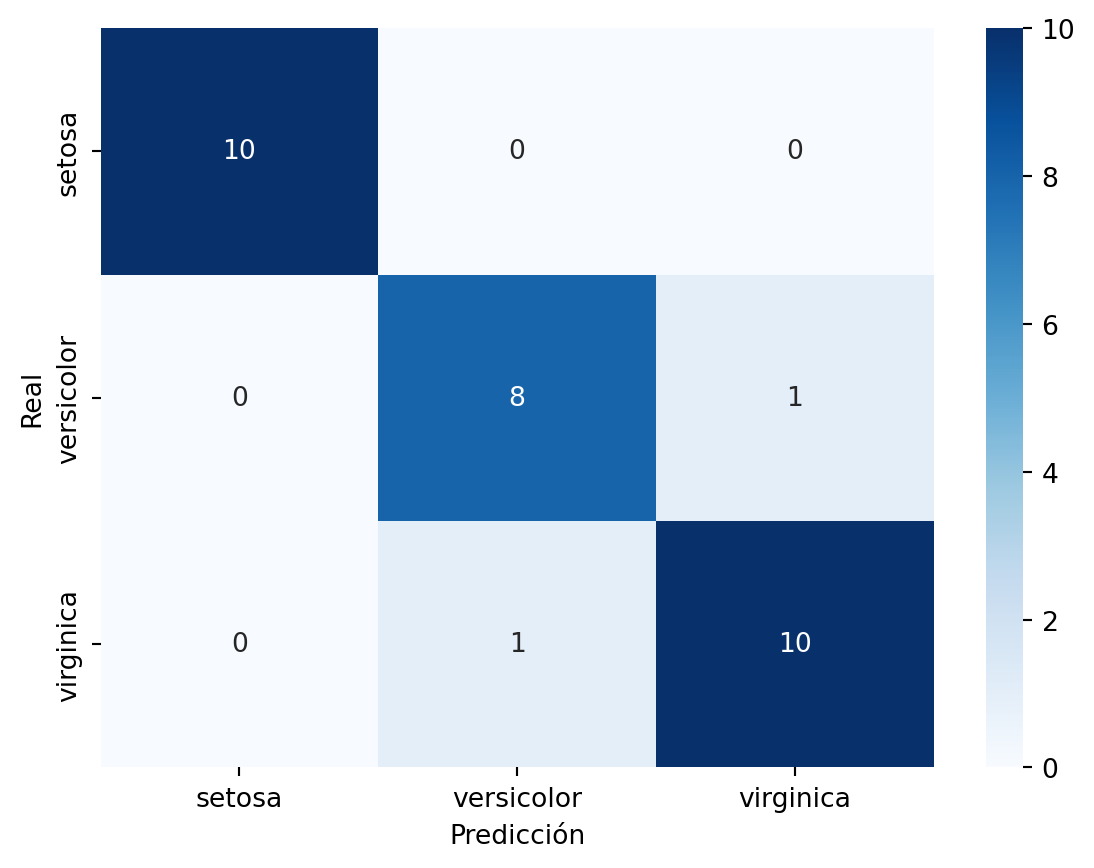

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score

# Calcular el área bajo la curva ROC
y_prob = clf.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
print(roc_auc)

0.9966414352379265


In [8]:
import torch

# Crear un tensor de ceros
x = torch.zeros(2, 3)

print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [9]:
import numpy as np

# Crear un arreglo de NumPy
arr = np.array([[1, 2, 3], [4, 5, 6]])

# Crear un tensor de PyTorch a partir de un arreglo de NumPy
x = torch.tensor(arr)

print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [10]:
# Crear un tensor de enteros
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int64)

print(x)

# Crear un tensor de booleanos
x = torch.tensor([[True, False], [False, True]])

print(x)

# Crear un tensor de punto flotante
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]], dtype=torch.float32)

print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ True, False],
        [False,  True]])
tensor([[1., 2.],
        [3., 4.]])


In [11]:
# Crear un tensor de 3 dimensiones
x = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

print(x)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


In [12]:
# Crear dos tensores
x = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
y = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Sumar los tensores
z = x + y

print(z)

# Multiplicar los tensores
z = x * y
print(z)

# Multiplicar un tensor por un escalar
z = 2 * x
print(z)

# Calcular la transpuesta de un tensor
z = x.t()
print(z)

# Calcular el producto punto de dos tensores
z = torch.dot(x.view(-1), y.view(-1))
print(z)

# Calcular el producto matricial de dos tensores
z = torch.mm(x, y)

print(z)

# Calcular la inversa de un tensor
z = torch.inverse(x)

print(z)

# Calcular la norma de un tensor
z = torch.norm(x)

print(z)

# Calcular la media de un tensor
z = torch.mean(x)

print(z)

# Calcular la desviación estándar de un tensor
z = torch.std(x)

print(z)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[2., 4.],
        [6., 8.]])
tensor([[1., 3.],
        [2., 4.]])
tensor(70.)
tensor([[19., 22.],
        [43., 50.]])
tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])
tensor(5.4772)
tensor(2.5000)
tensor(1.2910)


In [13]:
# Crear un tensor de 3 dimensiones
x = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# Obtener la forma del tensor
print(f"Shape: {x.shape}")

# Obtener el número de elementos en el tensor
print(f"Size: {x.size()}")

# Obtener el tipo de datos del tensor
print(f"Data type: {x.dtype}")

# Obtener el dispositivo en el que se almacena el tensor
print(f"Device: {x.device}")

# Obtener el número de dimensiones del tensor
print(f"Number of dimensions: {x.dim()}")

# Obtener el número de elementos en una dimensión específica
print(f"Number of elements in the first dimension: {x.size(0)}")

# Obtener el elemento en una posición específica
print(f"Element at position (0, 1, 1): {x[0, 1, 1]}")

# Obtener un subtensor
print(f"Subtensor: {x[0, :, :]}")

# Cambiar la forma del tensor
print(f"Reshape: {x.view(2, 4)}")

# Aplanar el tensor
print(f"Flatten: {x.view(-1)}")

# Concatenar tensores
y = torch.tensor([[[9, 10], [11, 12]], [[13, 14], [15, 16]]])
z = torch.cat((x, y), dim=0)

print(z)

# Dividir un tensor
z1, z2 = torch.chunk(z, 2, dim=0)

print(f"z1: {z1}")
print(f"z2: {z2}")

# Calcular la suma acumulada de un tensor
z = torch.cumsum(x, dim=0)

print(f"Cumulative sum: {z}")

Shape: torch.Size([2, 2, 2])
Size: torch.Size([2, 2, 2])
Data type: torch.int64
Device: cpu
Number of dimensions: 3
Number of elements in the first dimension: 2
Element at position (0, 1, 1): 4
Subtensor: tensor([[1, 2],
        [3, 4]])
Reshape: tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
Flatten: tensor([1, 2, 3, 4, 5, 6, 7, 8])
tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
z1: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
z2: tensor([[[ 9, 10],
         [11, 12]],

        [[13, 14],
         [15, 16]]])
Cumulative sum: tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 6,  8],
         [10, 12]]])


In [14]:
import torch
import torch.nn as nn

# Crear la red neuronal artificial

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = MLP()

print(model)

MLP(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

model = MLP()

# Convertir los datos a tensores de PyTorch
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.long)

print(X.shape)
print(y.shape)

# Obtener las predicciones de la red neuronal artificial
y_pred = model(X)

print(y_pred)

torch.Size([150, 4])
torch.Size([150])
tensor([[0.6349, 0.1950, 0.1701],
        [0.6065, 0.2048, 0.1887],
        [0.6116, 0.2044, 0.1840],
        [0.5971, 0.2105, 0.1924],
        [0.6357, 0.1955, 0.1687],
        [0.6616, 0.1829, 0.1554],
        [0.6185, 0.2021, 0.1794],
        [0.6240, 0.1996, 0.1764],
        [0.5845, 0.2150, 0.2005],
        [0.6026, 0.2083, 0.1891],
        [0.6501, 0.1886, 0.1612],
        [0.6139, 0.2047, 0.1813],
        [0.5980, 0.2098, 0.1922],
        [0.5904, 0.2143, 0.1954],
        [0.6842, 0.1733, 0.1424],
        [0.6968, 0.1684, 0.1348],
        [0.6738, 0.1770, 0.1492],
        [0.6397, 0.1919, 0.1684],
        [0.6627, 0.1820, 0.1553],
        [0.6491, 0.1896, 0.1613],
        [0.6313, 0.1955, 0.1733],
        [0.6497, 0.1878, 0.1625],
        [0.6349, 0.1966, 0.1685],
        [0.6314, 0.1927, 0.1759],
        [0.6041, 0.2094, 0.1865],
        [0.6034, 0.2060, 0.1905],
        [0.6306, 0.1948, 0.1746],
        [0.6351, 0.1947, 0.1702],
        [

In [16]:
# Obtener la clase predicha
y_pred = torch.argmax(y_pred, dim=1)

print(y_pred)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0])


In [17]:
import torch

# Crear un tensor de entrada
x = torch.tensor([[1.0, -1.0], [-1.0, 1.0]])

# Función de activación ReLU
relu = torch.nn.ReLU()
y = relu(x)

print(f"ReLU: {y}")

# Función de activación Sigmoid
sigmoid = torch.nn.Sigmoid()
y = sigmoid(x)

print(f"Sigmoid: {y}")

# Función de activación Softmax
softmax = torch.nn.Softmax(dim=1)
y = softmax(x)

print(f"Softmax: {y}")

# Función de activación Tanh
tanh = torch.nn.Tanh()
y = tanh(x)

print(f"Tanh: {y}")

# Función de activación LeakyReLU
leaky_relu = torch.nn.LeakyReLU(negative_slope=0.01)
y = leaky_relu(x)

print(f"LeakyReLU: {y}")

ReLU: tensor([[1., 0.],
        [0., 1.]])
Sigmoid: tensor([[0.7311, 0.2689],
        [0.2689, 0.7311]])
Softmax: tensor([[0.8808, 0.1192],
        [0.1192, 0.8808]])
Tanh: tensor([[ 0.7616, -0.7616],
        [-0.7616,  0.7616]])
LeakyReLU: tensor([[ 1.0000, -0.0100],
        [-0.0100,  1.0000]])


In [18]:
import torch.nn as nn

y_pred = torch.tensor([[0.1, 0.2, 0.7], [0.8, 0.1, 0.1], [0.2, 0.6, 0.2]])
y = torch.tensor([2, 0, 1])

# Crear la función de pérdida
criterion = nn.CrossEntropyLoss()

# Calcular la pérdida
loss = criterion(y_pred, y)

print(loss)

tensor(0.7694)


In [19]:
import torch.optim as optim

# Crear el optimizador
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Realizar la retropropagación
optimizer.zero_grad()

# loss.backward()

# Actualizar los pesos
optimizer.step()

In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar la base de datos iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir la base de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1014)

# Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

torch.Size([120, 4])
torch.Size([30, 4])
torch.Size([120])
torch.Size([30])


In [21]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 4)
        self.fc2 = nn.Linear(4, 4)
        self.fc3 = nn.Linear(4, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x
    
    def predict(self, x):
        with torch.no_grad():
            y = self.forward(x)
            return torch.argmax(y, dim=1)
    
model = NeuralNetwork()

print(model)

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=4, bias=True)
  (fc3): Linear(in_features=4, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [22]:
def train(model, X_train, y_train, criterion, optimizer, epochs):
    for epoch in range(epochs):
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}")

In [23]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

train(model, X_train, y_train, criterion, optimizer, epochs=1000)

Epoch 50/1000, Loss: 1.0910875797271729
Epoch 100/1000, Loss: 1.0895179510116577
Epoch 150/1000, Loss: 1.0878238677978516
Epoch 200/1000, Loss: 1.0859545469284058
Epoch 250/1000, Loss: 1.083863377571106
Epoch 300/1000, Loss: 1.0814882516860962
Epoch 350/1000, Loss: 1.0787522792816162
Epoch 400/1000, Loss: 1.0755527019500732


Epoch 450/1000, Loss: 1.071765422821045
Epoch 500/1000, Loss: 1.0672156810760498


Epoch 550/1000, Loss: 1.061697006225586
Epoch 600/1000, Loss: 1.054970383644104
Epoch 650/1000, Loss: 1.0467724800109863
Epoch 700/1000, Loss: 1.0369101762771606
Epoch 750/1000, Loss: 1.0253987312316895
Epoch 800/1000, Loss: 1.012649655342102
Epoch 850/1000, Loss: 0.9993350505828857
Epoch 900/1000, Loss: 0.9860514402389526


Epoch 950/1000, Loss: 0.973340630531311
Epoch 1000/1000, Loss: 0.9612424373626709


In [24]:
y_pred = model.predict(X_test)

print(y_pred)

tensor([2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
        0, 2, 2, 0, 2, 2])


In [25]:
accuracy = torch.sum(y_pred == y_test).item() / len(y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.5


In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(4, 2)
        self.fc2 = nn.Linear(2, 3)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.softmax(x)
        return x
    
    def predict(self, x):
        with torch.no_grad():
            y = self.forward(x)
            return torch.argmax(y, dim=1)

model = NeuralNetwork()

print(model)

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=3, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

train(model, X_train, y_train, criterion, optimizer, epochs=1500)

Epoch 50/1500, Loss: 1.0547822713851929
Epoch 100/1500, Loss: 0.9649003148078918
Epoch 150/1500, Loss: 0.9156875610351562
Epoch 200/1500, Loss: 0.8772019743919373
Epoch 250/1500, Loss: 0.849004328250885
Epoch 300/1500, Loss: 0.8299437165260315
Epoch 350/1500, Loss: 0.816134512424469
Epoch 400/1500, Loss: 0.8049288392066956


Epoch 450/1500, Loss: 0.795074999332428


Epoch 500/1500, Loss: 0.7859262228012085


Epoch 550/1500, Loss: 0.777136504650116
Epoch 600/1500, Loss: 0.7685341238975525


Epoch 650/1500, Loss: 0.760058581829071
Epoch 700/1500, Loss: 0.7517206072807312
Epoch 750/1500, Loss: 0.7435728907585144
Epoch 800/1500, Loss: 0.7356864809989929
Epoch 850/1500, Loss: 0.7281321883201599
Epoch 900/1500, Loss: 0.7209672331809998
Epoch 950/1500, Loss: 0.7142297029495239
Epoch 1000/1500, Loss: 0.707936704158783


Epoch 1050/1500, Loss: 0.7020877599716187


Epoch 1100/1500, Loss: 0.6966685056686401


Epoch 1150/1500, Loss: 0.691655695438385
Epoch 1200/1500, Loss: 0.6870208978652954


Epoch 1250/1500, Loss: 0.6827336549758911
Epoch 1300/1500, Loss: 0.6787639260292053
Epoch 1350/1500, Loss: 0.6750824451446533
Epoch 1400/1500, Loss: 0.6716623902320862
Epoch 1450/1500, Loss: 0.6684790253639221
Epoch 1500/1500, Loss: 0.6655101776123047


In [28]:
y_pred = model.predict(X_test)

accuracy = torch.sum(y_pred == y_test).item() / len(y_test)

print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


<Axes: >

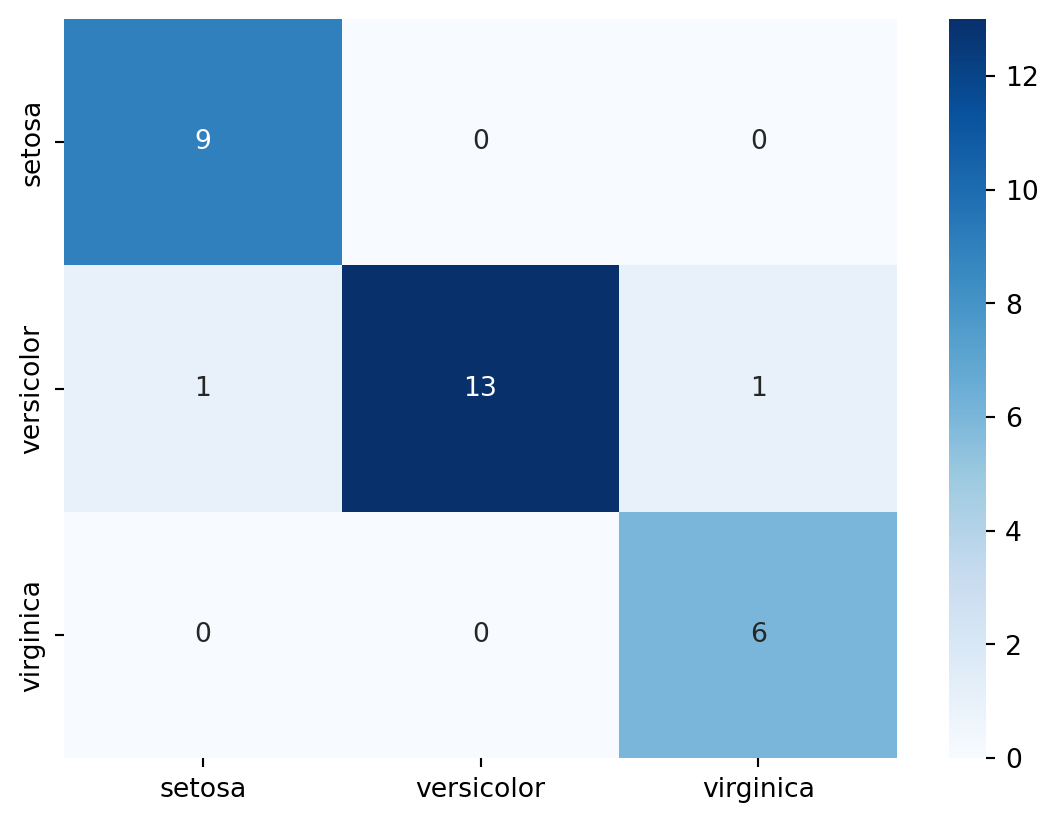

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cmap='Blues')

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Normalizar los datos utilizando la normalización min-max
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

# Normalizar los datos utilizando la normalización z-score
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

# Normalizar los datos utilizando la normalización por rango
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

df = pd.DataFrame(X_train, columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.250000          0.590909           0.084746          0.041667
1           0.583333          0.454545           0.593220          0.583333
2           0.472222          0.545455           0.593220          0.625000
3           0.500000          0.318182           0.627119          0.541667
4           0.388889          0.363636           0.542373          0.458333
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.813744          1.000766          -1.257121         -1.298710
1           0.611793          0.288759           0.384982          0.359218
2           0.136614          0.763431           0.384982          0.486751
3           0.255408         -0.423249           0.494455          0.231685
4          -0.219770         -0.185913           0.220772         -0.023381
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -

In [31]:
import tensorflow as tf

# Crear un tensor de ceros
x = tf.zeros((2, 3))

print(x)

2024-06-25 16:49:25.250321: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 16:49:25.254481: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 16:49:25.297864: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-06-25 16:49:26.326587: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)


In [32]:
# Crear dos tensores
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

# Sumar los tensores
z = x + y

print(z)

# Multiplicar los tensores
z = x * y

print(z)

# Multiplicar un tensor por un escalar
z = 2 * x

print(z)

# Calcular la transpuesta de un tensor
z = tf.transpose(x)

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)
